In [1]:
!pip install plotly

In [2]:
import pandas as pd
import plotly
import os 
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

from matplotlib.pyplot import cm
from pathlib import Path
from matplotlib import pyplot as plt


In [3]:
src_path = Path(r'/home/dmacs/Documents/Final Dissertation/Data/Volumes/')
dest_path = Path(r'/home/dmacs/Documents/Final Dissertation/Results/Volumes_Seasonal_Plots/')
files = os.listdir(src_path)
files

['XLSX',
 'Master_Volumes_Aggregated.csv',
 'Volumes 2014-2022.zip',
 'XLS',
 'Master_Volumes_Aggregated.xlsx',
 'HTML',
 'Volumes_Collated',
 'Volumes_Master_Collated.xlsx',
 'EW_XLSX']

In [4]:
df = pd.read_excel(src_path/'Master_Volumes_Aggregated.xlsx')
df

,Year,Month,Year-Mon,Barley,Maize,Mustard,Soyabean,Wheat,Bengal Gram(Chana Dal),Bengal Gram (Whole)
0,2014,1,201401,9795.84,559420.16,189593.67,445713.43,506936.70,4775.10,88897.24
1,2014,2,201402,10150.19,619812.25,293354.86,468503.14,551422.35,5039.72,167656.47
2,2014,3,201403,53478.21,371756.96,1070311.92,389533.95,2687436.53,5467.20,293386.02
3,2014,4,201404,551574.30,298859.62,1278855.71,200669.12,15485482.85,4635.20,395275.33
4,2014,5,201405,190064.60,245252.83,623628.18,197163.78,10582314.33,7565.70,310446.71
...,...,...,...,...,...,...,...,...,...,...
103,2022,8,202208,10262.17,260833.79,142252.58,290479.25,1122528.08,12882.23,111674.88
104,2022,9,202209,9794.69,223293.00,136049.76,249192.85,1143310.55,13070.87,95245.79
105,2022,10,202210,8541.57,502673.17,132991.19,1099359.86,868319.38,15867.76,85734.84
106,2022,11,202211,11772.89,1405222.10,197768.38,1367844.01,972416.29,11712.62,113741.43


In [5]:
df['Year-Mon'] = pd.to_datetime(df['Year-Mon'],format = '%Y%m')
df

,Year,Month,Year-Mon,Barley,Maize,Mustard,Soyabean,Wheat,Bengal Gram(Chana Dal),Bengal Gram (Whole)
0,2014,1,2014-01-01,9795.84,559420.16,189593.67,445713.43,506936.70,4775.10,88897.24
1,2014,2,2014-02-01,10150.19,619812.25,293354.86,468503.14,551422.35,5039.72,167656.47
2,2014,3,2014-03-01,53478.21,371756.96,1070311.92,389533.95,2687436.53,5467.20,293386.02
3,2014,4,2014-04-01,551574.30,298859.62,1278855.71,200669.12,15485482.85,4635.20,395275.33
4,2014,5,2014-05-01,190064.60,245252.83,623628.18,197163.78,10582314.33,7565.70,310446.71
...,...,...,...,...,...,...,...,...,...,...
103,2022,8,2022-08-01,10262.17,260833.79,142252.58,290479.25,1122528.08,12882.23,111674.88
104,2022,9,2022-09-01,9794.69,223293.00,136049.76,249192.85,1143310.55,13070.87,95245.79
105,2022,10,2022-10-01,8541.57,502673.17,132991.19,1099359.86,868319.38,15867.76,85734.84
106,2022,11,2022-11-01,11772.89,1405222.10,197768.38,1367844.01,972416.29,11712.62,113741.43


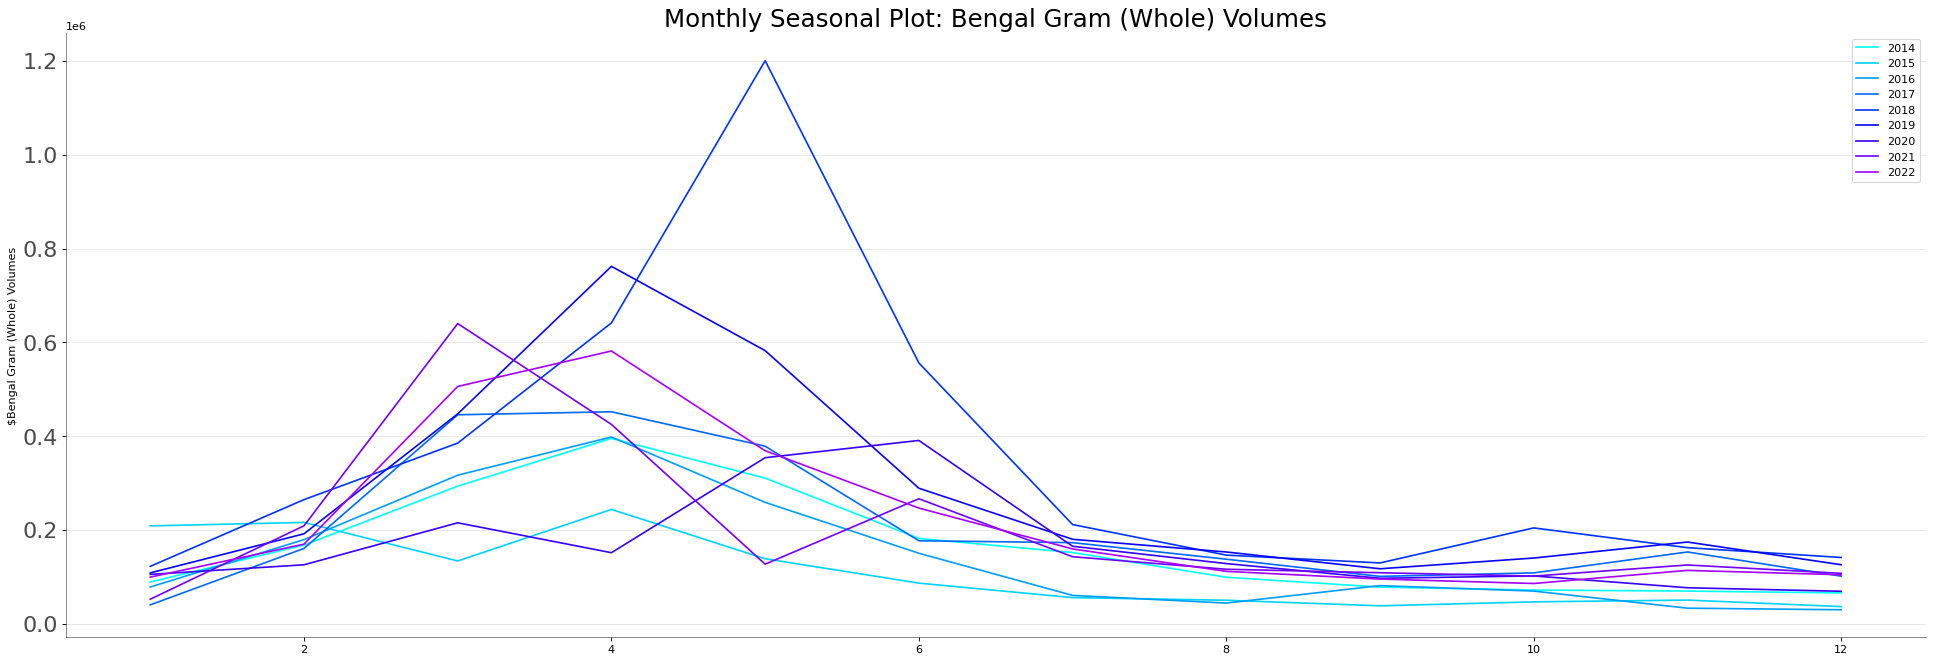

In [29]:
mycolors = cm.hsv(np.linspace(0.5, 1, 15))
plt.figure(figsize=(30,10), dpi= 80)
col = 'Bengal Gram (Whole)'
for i, y in enumerate(range(2014,2023)):
    plt.plot(
        'Month', 
        col, 
        data = df.loc[df.Year == y, :], 
        color=mycolors[i], 
        label=y
    )

    """plt.text(
        df.loc[df.Year==y, :].shape[0]+0.1, 
        df.loc[df.Year==y, 'Barley'][-1:].values[0] + 0.2, 
        y, 
        fontsize=12, 
        color=mycolors[i]
    )
"""
    
# Decoration

plt.ylabel('${} Volumes'.format(col))
plt.yticks(fontsize=20, alpha=.7)
plt.title("Monthly Seasonal Plot: {} Volumes".format(col), fontsize=22)
plt.grid(axis='y', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.5)   
plt.legend()

"""plt.legend(loc=0, 
           ncol=2, 
           fontsize=8,
          bbox_to_anchor=(0.555, 0.5, 0.5, 0.5))

"""
plt.savefig(dest_path / '{}.jpeg'.format(col))
plt.show()


In [30]:
fig = px.line_polar(
    df, r=col,
    color = "Year",
    theta =  df.set_index('Year-Mon').index.strftime('%B'),
    line_close=False,
    color_discrete_sequence=px.colors.sequential.Plasma_r,
    template="plotly_dark"
   )
fig.show()
fig.write_html(dest_path / '{}.html'.format(col))

In [31]:
fig = go.Figure()

fig.add_trace(go.Scatter(
        x=df['Year-Mon'],
        y=df[col],
        mode='lines' ,
        name = 'Time Series Plot {}'.format(col)
    ))

#fig.update_layout(legend_title_text = legend_title)
fig.update_layout(title_text='Time Series Plot-{}'.format(col),title_y=0.95,title_x=0.5)
fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Volumes in Tonnes")

fig.write_html(dest_path / 'Time_series-{}.html'.format(col))
fig.show() 